<a href="https://colab.research.google.com/github/wayne0git/ml_cv_basics/blob/master/object_detection/yolo_v1_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO v1 Example
### https://pyimagesearch.com/2022/04/11/understanding-a-real-time-object-detection-network-you-only-look-once-yolov1/

## Environment Preparation
## (Assume CUDA, CUDNN, and NVIDIA Driver Installed)

In [ ]:
# Sanity check for GPU as runtime
!nvidia-smi

In [ ]:
# Install OpenCV, ffmpeg modules
!apt install libopencv-dev python-opencv ffmpeg

In [1]:
# Clone AlexeyAB darknet repository
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Total 15420 (delta 0), reused 0 (delta 0), pack-reused 15420
Receiving objects: 100% (15420/15420), 14.05 MiB | 15.68 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


In [2]:
# Change the directory to darknet 
%cd darknet

/content/darknet


In [ ]:
# Enable the OpenCV, CUDA, CUDNN, CUDNN_HALF & LIBSO Flags and Compile Darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/g' Makefile
!make

In [ ]:
# Download YOLOv1 Weights
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

In [ ]:
# Download YOLOv2 Weights
!wget http://pjreddie.com/media/files/yolov2-voc.weights

In [ ]:
# Download YOLOv3 Weights
!wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
# Download YOLOv4 Weights
!wget https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov4.weights

# Inference

## Script Code

In [ ]:
# Run the darknet image inference script
# --input : Path to the images directory or text file with the path to the images or a single image name
# --weights : YOLOv1 weights path.
# --config_file : Configuration file path for YOLOv1.
# --data_file : Here, we pass the Pascal VOC labels file.
# --dont_show : This will disable OpenCV from displaying the inference results, and we use this since we are working with colab.
!python3 darknet_images.py --input data --weights yolov1.weights --config_file cfg/yolov1/yolo.cfg --data_file cfg/voc.data --dont_show

In [ ]:
# YOLOv2
!python3 darknet_images.py --input data --weights yolov2-voc.weights --config_file cfg/yolov2-voc.cfg --data_file cfg/voc.data --dont_show

In [ ]:
# YOLOv3
!python3 darknet_images.py --input data --weights yolov3.weights --config_file cfg/yolov3.cfg --dont_show

## Library

In [27]:
import cv2
import matplotlib.pyplot as plt
from darknet import darknet

In [20]:
# Parameter
IMG_FPATH = 'data/dog.jpg'

YOLO_CONFIG = 'cfg/yolov4.cfg'
YOLO_WEIGHTS = 'yolov4.weights'
COCO_DATA = 'cfg/coco.data'

CONF_TH = 0.5

In [14]:
# Initialize YOLO
(network, classNames, _) = darknet.load_network(YOLO_CONFIG, COCO_DATA, YOLO_WEIGHTS)

width = darknet.network_width(network)
height = darknet.network_height(network)

In [22]:
# Load & Preprocess image
image = cv2.imread(IMG_FPATH)
img_shape = image.shape

imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageResized = cv2.resize(imageRGB, (width, height), interpolation=cv2.INTER_LINEAR)

In [ ]:
# Set input data
darknetImage = darknet.make_image(width, height, 3)
darknet.copy_image_from_bytes(darknetImage, imageResized.tobytes())

In [ ]:
# Inference
detections = darknet.detect_image(network, classNames, darknetImage, thresh=CONF_TH)
darknet.free_image(darknetImage)

In [33]:
# Overlay
img_show = imageResized.copy()

for cls, conf, box in detections:
    # Preprocess bounding box
    (cx, cy, w, h) = box

    x = int(round(cx - (w / 2)))
    y = int(round(cy - (h / 2)))

    # Overlay
    cv2.rectangle(img_show, (x, y), (x + int(w), y + int(h)), (0, 255, 0), 2)
    cv2.putText(img_show, '%s: %.2f' % (cls, float(conf)), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

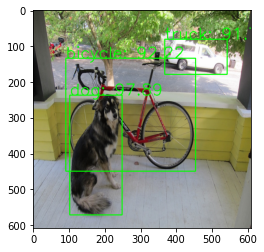

In [34]:
# Show result
fig = plt.figure()
plt.imshow(img_show)
plt.show()